In [3]:
import itertools
%matplotlib inline
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import vertex_model as model
# from vertex_model.run_select_nosaveinfo import run_simulation_INM, definecolors, run_simulation_no_INM
import itertools
import numpy as np
import matplotlib.pyplot as plt
import vertex_model as model
import vertex_model.initialisation as init
from vertex_model.forces import TargetArea, Tension, Perimeter, Pressure
import os
import seaborn as sns
import warnings
import matplotlib.colors as colors
warnings.filterwarnings('ignore') #Don't show warnings
#from Gobal_Constant import dt, viscosity, t_G1, t_G2, t_S, A_c, J, pos_d, T1_eps, P, microns, time_hours, expansion_constant #file with necessary constants
from vertex_model.run_select import save_data
sns.set_style("whitegrid")
import math

In [4]:
#Global constants
#Global constants
dt=0.001            #time step
viscosity= 0.02  #viscosity*dv/dt = F
P= 0.0
expansion_constant = 1
Number_simulations = 50
K=1.0 #area elasticity
G= 0.04 #contractility of the cell
L=0.075 #line tensions
Lambda_0 = 0.68 #Line tensions can be reduced by increasing cell-cell adhesion or reducing actin- myosin contractility
t_end = 5
area_dimension= 177 #np.pi*(15/2.0)**2 #15 micrometros de diámetro

In [5]:
# run simulation
def run(simulation,N_step,skip):
    N_step = math.floor(N_step)
    skip = math.floor(skip)
    iter =  itertools.islice(simulation,0,N_step,skip)
    return [cells.copy() for cells in itertools.islice(simulation,0,N_step,skip)]

#simulation without division
def basic_simulation(cells,force,dt=dt,T1_eps=0.04):
    expansion = np.array([0.0,0.0])
    while True:
        cells.mesh , number_T1 = cells.mesh.transition(T1_eps)
        F = force(cells)/viscosity
        dv = dt*model.sum_vertices(cells.mesh.edges,F) 
        if hasattr(cells.mesh.geometry,'width'):
            expansion[0] = expansion_constant*np.average(F[0]*cells.mesh.vertices[0])*dt/(cells.mesh.geometry.width**2)
        if hasattr(cells.mesh.geometry,'height'): #Cylinder mesh doesn't have 'height' argument
            expansion[1] = np.average(F[1]*cells.mesh.vertices[1])*dt/(cells.mesh.geometry.height**2)
        cells.mesh = cells.mesh.moved(dv).scaled(1.0+expansion)
        yield cells
def basic_simulation2(cells,force,dt=dt,T1_eps=0.04):
    expansion = np.array([0.0,0.0])
    while True:
#         print cells.properties['parent_group']
        cells.mesh , number_T1, edg_rem = cells.mesh.transition(T1_eps)
#         cells.properties['Gamma'][cells.mesh.face_ids == 50]=np.array([0.0])
        F = force(cells)/viscosity
#         expansion = 0.05*np.average(F*cells.mesh.vertices,1)*dt
        dv = dt*model.sum_vertices(cells.mesh.edges,F) 
#         cells.mesh = cells.mesh.moved(dv).scaled(1.0+ expansion)
        if hasattr(cells.mesh.geometry,'width'):
            expansion[0] = expansion_constant*np.average(F[0]*cells.mesh.vertices[0])*dt/(cells.mesh.geometry.width**2)
        if hasattr(cells.mesh.geometry,'height'): #Cylinder mesh doesn't have 'height' argument
            expansion[1] = np.average(F[1]*cells.mesh.vertices[1])*dt/(cells.mesh.geometry.height**2)
        cells.mesh = cells.mesh.moved(dv).scaled(1.0+expansion)
        yield cells

In [7]:
def definecolors(cells):
    peach = '#eed5b7'
    light_blue ='#87cefa'
    pink = '#ffc0cb'
    light_green = '#98fb98'
    import matplotlib.colors as colors
    vv=sns.color_palette("hls", 10)
    v=[colors.rgb2hex(colorrgb) for colorrgb in vv]
    palette = np.array([light_green, pink,light_green,'g','r','g','m','c','',peach])
    palette = np.array([v[0],v[1],v[1], v[1],v[4],v[5],v[6],v[7],v[8],v[9],peach])
    colors = cells.properties['parent_group']
    return palette[colors]

# Con 10 celulas en el eje X 
# Con expansion_constan= 1 (1./expansion_constant) = 1


In [8]:
history_10={}
#ids_Gamma0 = random.sample(range(1, 100), 10)
ids_Gamma0 = [1,15,30,6,98, 23,42,56,68,71] #las q tienen menos ecadherina
for i in range(1):
    #run simulation with the choosen parameters
    rand =  np.random.RandomState() #random number to choose Lambda
    params = [K,G,L]  # K=x[0],G=x[1],L=x[2]
    mesh = init.toroidal_random_mesh(10,10,rand=rand)
    cells = model.Cells(mesh,properties={'K':K,'Gamma':G,'P':0.0,'boundary_P':P,'Lambda':L, 'Lambda_boundary':0.5, 'A0':1.0})
    force = TargetArea() + Tension() + Perimeter() + Pressure()
    step = int(50/dt)
    history_init_10= run(basic_simulation2(cells,force),step,int(1/dt)) 
    expansion_constant = 1
    cells = history_init_10[-1].copy()
    cells.properties['parent_group'] = np.zeros(len(cells),dtype=int)
    cells.properties['parent_group'][np.where([cells.mesh.face_ids == index for index in ids_Gamma0])[1]] = 1
    cells.properties['Gamma']= np.array([G,0])[cells.properties['parent_group']]
    cells.properties['Lambda']= np.array([L,Lambda_0])[cells.properties['parent_group']]
    force = TargetArea() + Tension() + Perimeter() + Pressure()
    N_Step = math.floor(t_end/dt)
    history_10[i]= run(basic_simulation2(cells,force),N_Step,.010/dt) 
    save_data(i,history_10[i],'cells10')

[56] [210 211 212 231 232 233]
[42] [138 139 140 231 232 233]
[68] [300 301 302 408 409 410]
[98] [537 538 539 549 550 551]
[15] [ 42  43  44 402 403 404]
[1] [207 208 209 378 379 380]
[6] [  9  10  11 273 274 275]
[30] [ 87  88  89 414 415 416]
[23] [ 81  82  83 534 535 536]
[71] [303 304 305 309 310 311]


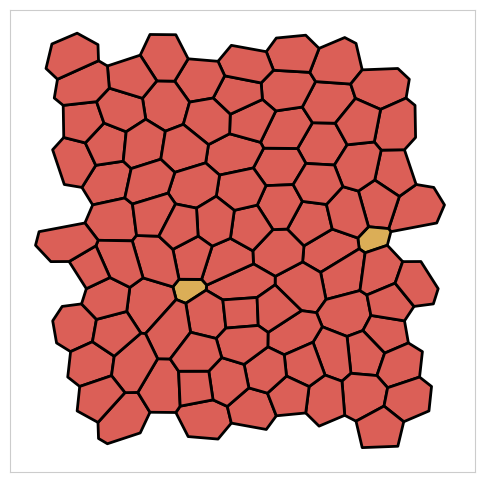

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [9]:
i=0
hh = history_10[i]
for cells in hh:
    #ids_nofronter = [1,15,30,6,98, 23,42,56,68,71]
    #cells.properties['parent_group'] = np.zeros(len(cells),dtype=int)
    #cells.properties['parent_group'][np.where([cells.mesh.face_ids == index for index in ids_nofronter])[1]] = 1
    cells.properties['color'] = definecolors(cells)
    cells.properties['parent_group'] = np.zeros(len(cells),dtype=int)
    #ids_Gamma0 = [1,15,30,6,98, 23,42,56,68,71]
    #cells.properties['parent_group'][np.where([cells.mesh.face_ids == index for index in ids_Gamma0])[1]] = 1
# definition of the frame for the interactive video
history_10_plot = hh[0:40]#+history1
fig=plt.figure()
fig.set_size_inches(6,6);
ax = fig.gca()
# initialization function: plot the background of each frame
def init_fig():
    ax = plt.figure();
    return (ax,)
# animation function. This is called sequentially
def animate_fig(i):
    cells_array=history_10_plot
    v_max = np.max((np.max(cells_array[-1].mesh.vertices), np.max(cells_array[0].mesh.vertices)))
    size = 2.0*v_max
    cells= history_10_plot[i]
    return model.draw(cells,ax,size)
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig,animate_fig, init_func=init_fig,
                               frames=(len(history_10_plot)))
HTML(anim.to_html5_video())

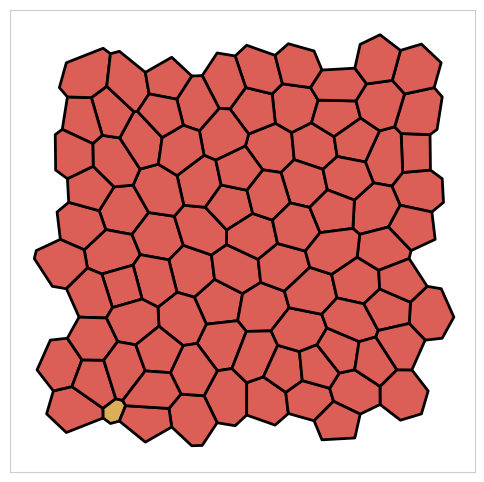

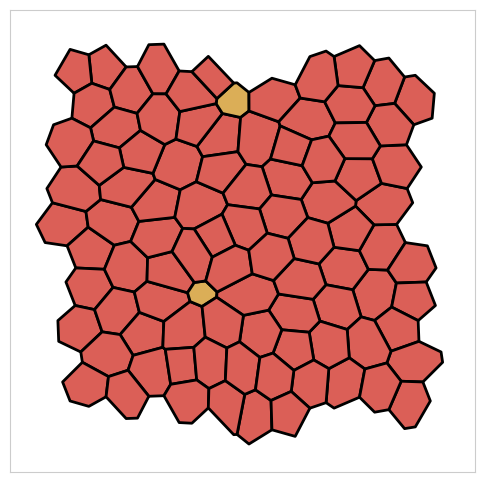

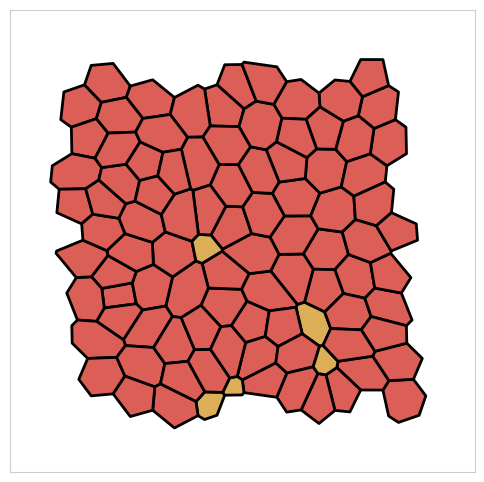

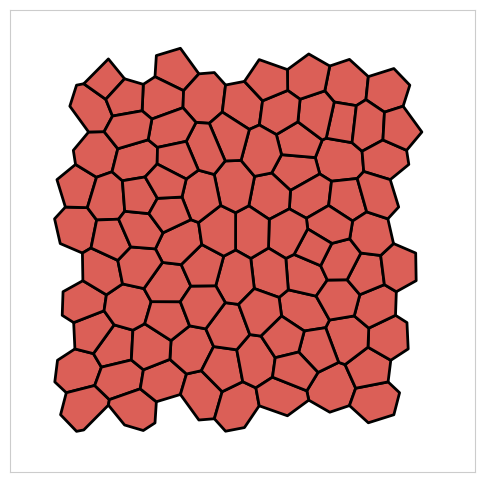

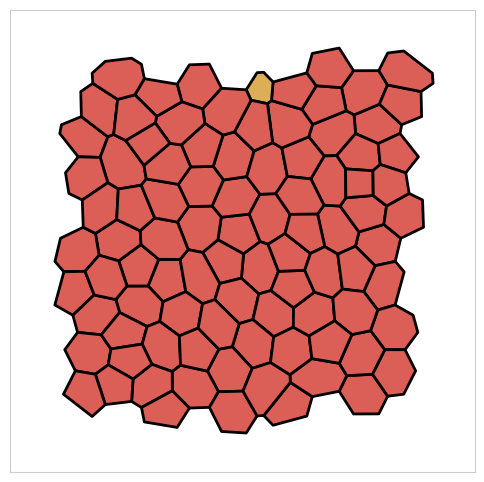

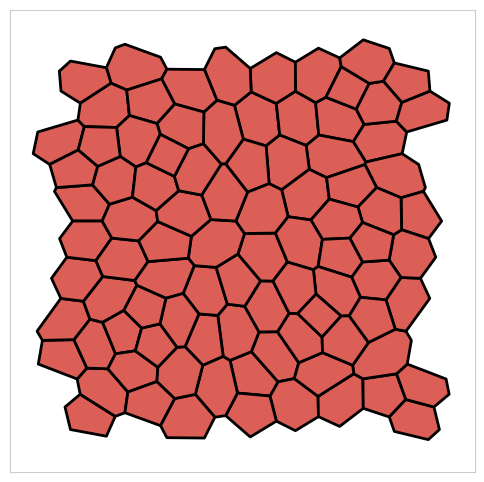

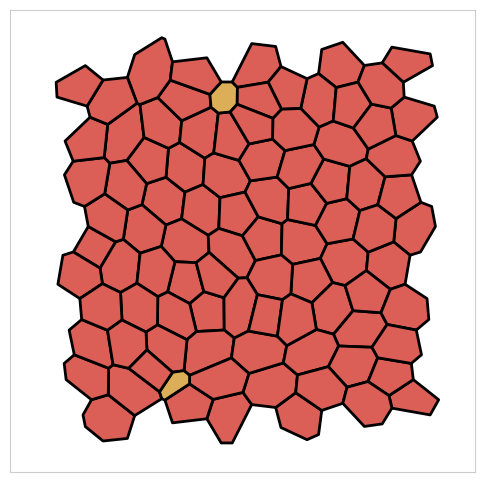

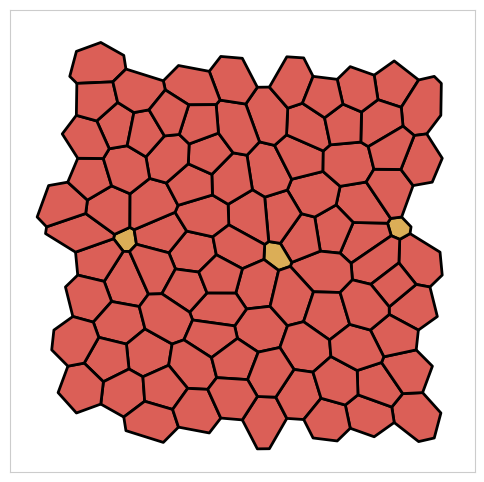

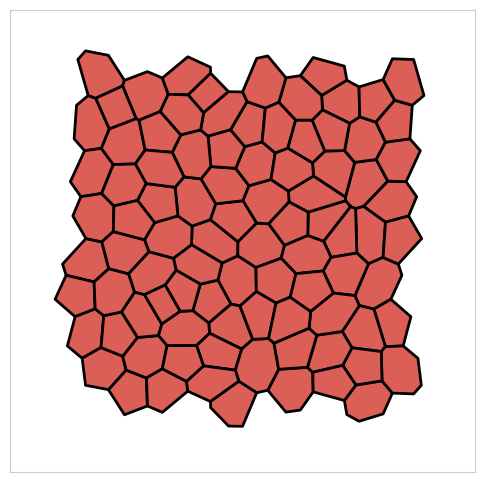

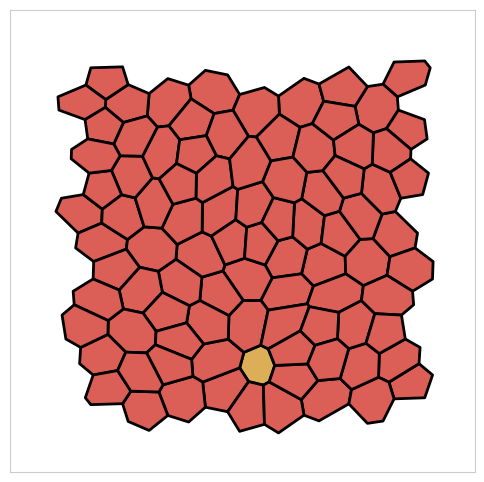

In [12]:
for i in range(10):
    hh = history_10[i]
    for cells in hh:
        ids_nofronter = ids_Gamma0 #[1,15,30,6,98, 23,42,56,68,71]
        cells.properties['parent_group'] = np.zeros(len(cells),dtype=int)
        cells.properties['parent_group'][np.where([cells.mesh.face_ids == index for index in ids_nofronter])[1]] = 1
        cells.properties['color'] = definecolors(cells)
        #cells.properties['parent_group'] = np.zeros(len(cells),dtype=int)
        #ids_Gamma0 = [1,15,30,6,98, 23,42,56,68,71]
        #cells.properties['parent_group'][np.where([cells.mesh.face_ids == index for index in ids_Gamma0])[1]] = 1
    # definition of the frame for the interactive video
    history_10_plot = hh[0:40]#+history1
    fig=plt.figure()
    fig.set_size_inches(6,6);
    ax = fig.gca()
    # initialization function: plot the background of each frame
    def init_fig():
        ax = plt.figure();
        return (ax,)
    # animation function. This is called sequentially

    cells_array=history_10_plot
    v_max = np.max((np.max(cells_array[-1].mesh.vertices), np.max(cells_array[0].mesh.vertices)))
    size = 2.0*v_max
    cells= history_10_plot[-1]
    model.draw(cells,ax,size)


In [8]:
'''
generation1=[cells.mesh.area for cells in history_init_10+history_10[i]]
#print generation1[-1]
ii=0
generation1=generation1[-1]
n=len(generation1)
a=[]
for i in range(n-1):
    if generation1[i]>0:
        ii=ii+1
        a.append(generation1[i])
        

#fig=plt.figure()
#plt.hist(generation1)
fig=plt.figure()
plt.hist(a)
plt.xlabel('Area')

#generation1=[cells.mesh.area for cells in history_10[0]]
generation1 = [np.bincount(cells.mesh.face_id_by_edge) for cells in history_10[0]]
death=[cells.empty() for cells in history_10[0]]
properties= [cells.properties['parent_group'] for cells in history_10[0]]
ii=0
n=40#len(generation1)
a=[]
#fig=plt.figure()

for i in range(0,n,5):
    fig=plt.figure()
    valid=np.where(~death[i])[0]
    plt.hist(generation1[i][valid], label='time=%i'%i, alpha=0.5)
    plt.legend()
    #print(np.mean(generation1[i][valid]))
for i in xcoords:
    fig=plt.figure()
    valid=np.where(~death[i])[0]
    plt.hist(generation1[i][valid], label='time=%i'%i, alpha=0.5)
    plt.legend()
    #print(np.mean(generation1[i][valid]))
    
i=0
#plt.hist(generation1[i], label='time=%i'%i)
plt.xlabel('neigbours')

plt.figure()
for i in [0,15,30]:
    valid=np.where(~death[i])[0]
    plt.hist(generation1[i][valid], density=True, histtype='bar',label='time=%i'%i, alpha=0.5)
    plt.legend()
plt.xlabel('neigbours')

plt.figure()
for i in [0,15,30]:
    valid=np.where(~death[i])[0]
    plt.hist(generation1[i][valid], density=True, histtype='bar',label='time=%i'%i, alpha=0.5)
    plt.legend()
plt.xlabel('neigbours')
'''

"\ngeneration1=[cells.mesh.area for cells in history_init_10+history_10[i]]\n#print generation1[-1]\nii=0\ngeneration1=generation1[-1]\nn=len(generation1)\na=[]\nfor i in range(n-1):\n    if generation1[i]>0:\n        ii=ii+1\n        a.append(generation1[i])\n        \n\n#fig=plt.figure()\n#plt.hist(generation1)\nfig=plt.figure()\nplt.hist(a)\nplt.xlabel('Area')\n\n#generation1=[cells.mesh.area for cells in history_10[0]]\ngeneration1 = [np.bincount(cells.mesh.face_id_by_edge) for cells in history_10[0]]\ndeath=[cells.empty() for cells in history_10[0]]\nproperties= [cells.properties['parent_group'] for cells in history_10[0]]\nii=0\nn=40#len(generation1)\na=[]\n#fig=plt.figure()\n\nfor i in range(0,n,5):\n    fig=plt.figure()\n    valid=np.where(~death[i])[0]\n    plt.hist(generation1[i][valid], label='time=%i'%i, alpha=0.5)\n    plt.legend()\n    #print(np.mean(generation1[i][valid]))\nfor i in xcoords:\n    fig=plt.figure()\n    valid=np.where(~death[i])[0]\n    plt.hist(generation

In [ ]:
a_10=np.zeros(len(history_10[0])-1)
a_std_10 = np.zeros(len(history_10[0])-1)
pp_10=np.zeros(len(history_10[0])-1)
aa_10=np.zeros(len(history_10[0])-1)
xcoords = []
for j in range(Number_simulations):
    generation_a=[cells.mesh.area for cells in  history_10[j]]
    generation_p=[cells.mesh.perimeter for cells in history_10[j]]
    generation_n=[np.bincount(cells.mesh.face_id_by_edge) for cells in history_10[j]]
    death=[cells.empty() for cells in history_10[j]]
    properties= [cells.properties['parent_group'] for cells in history_10[j]]
    #mean variables in time
    area_mean=[]
    area_mean_10=[]
    area_std_10=[]
    perimeter_mean=[]
    perimeter_mean_10=[]
    neigh_mean=[] 
    number_cells = []
    neigh_mean_10 = []
    ids_face_by_edge = []
    #ids_Gamma0 = [1,15,30,6,98, 23,42,56,68,71]
    
    for i in range(0,len(history_10[j])-1):
        valid=np.where(~death[i] & (generation_a[i]>0))[0]
        cells_area_0= np.where((properties[-1]==1) & (generation_a[-1]==0))[0]
        number_cells = np.append(number_cells, len(valid))
        area_mean=np.append(area_mean,np.mean(generation_a[i][valid]))
        perimeter_mean=np.append(perimeter_mean,np.mean(generation_p[i][valid]))
        perimeter_mean_10=np.append(perimeter_mean_10,np.mean(generation_p[i][cells_area_0]))
        neigh_mean_10=np.append(neigh_mean_10,np.mean(generation_n[i][valid]))
        area_mean_10=np.append(area_mean_10,np.mean(generation_a[i][cells_area_0]))
        area_std_10=np.append(area_std_10,np.std(generation_a[i][cells_area_0])/(len(generation_a[i][cells_area_0])))
        len_ids = len(ids_Gamma0)
        #saving exclusion cells time.
        ii=0
        while ii <len_ids:
            if generation_a[i][ids_Gamma0[ii]]==0:
                xcoords.append(i)
                #print 'remove', i, ids_Gamma0[ii],ids_Gamma0, ii
                ids_Gamma0.pop(ii)
                len_ids= len(ids_Gamma0)
            ii=ii+1
    a_10=a_10+area_mean_10
    a_std_10=a_std_10+area_std_10
    aa_10=aa_10+area_mean
    pp_10=pp_10+perimeter_mean
a_10= a_10/Number_simulations
a_std_10=a_std_10/np.sqrt(Number_simulations)
aa_10= aa_10/Number_simulations
pp_10= pp_10/Number_simulations

In [10]:
'''
#generation1=[cells.mesh.area for cells in history_10[0]]
death=[cells.empty() for cells in history_10[0]]
properties= [cells.properties['parent_group'] for cells in history_10[0]]
ii=0
n=23#len(generation1)
a=[]
#fig=plt.figure()
for i in range(0,n,5):
    fig=plt.figure()
    valid=np.where(~death[i])[0]
    plt.hist(generation_p[i][valid]/np.sqrt(generation_a[i][valid]), label='time=%i'%i, alpha=0.5)
    print(np.mean(generation_p[i][valid]/np.sqrt(generation_a[i][valid])))
        
i=0
#plt.hist(generation1[i], label='time=%i'%i)
plt.xlabel('Area')
plt.legend()

'''

'''
#plt.plot(area_mean_1)
a=perimeter_mean_10/np.sqrt(area_mean_10)
plt.plot(np.where(np.isnan(a), 0, a))
for xc in xcoords:
    plt.axvline(x=xc,color='r')
plt.plot()
plt.xlim(0,100)
'''

"\n#plt.plot(area_mean_1)\na=perimeter_mean_10/np.sqrt(area_mean_10)\nplt.plot(np.where(np.isnan(a), 0, a))\nfor xc in xcoords:\n    plt.axvline(x=xc,color='r')\nplt.plot()\nplt.xlim(0,100)\n"

In [ ]:
#plt.plot(area_mean_1)
a=pp_10/np.sqrt(aa_10)
plt.plot(np.where(np.isnan(a), 0, a))
for xc in xcoords:
    plt.axvline(x=xc,color='r')
plt.plot()
plt.xlim(0,100)

In [ ]:
#plt.plot(a_10)
plt.fill_between(range(len(a_10)), a_10+a_std_10, (a_10)-a_std_10, alpha=0.5)
plt.plot(a_10)
#for xc in xcoords:
 #   plt.axvline(x=xc,color='r')
#plt.xlim(0,20)

In [13]:
np.mean(a_10)

0.0099185123550286254

In [14]:
import scipy
scipy.stats.sem(a_10)

0.0019029677645445409

In [15]:
np.std(a_10)/np.sqrt(len(a_10))

0.0019010600269576596

In [16]:
len(a_10)

499

# 15 celulas en el eje X
# Con expansion_constan= 1 (1./expansion_constant) = 1


In [17]:
history_15={}
#ids_Gamma0 = random.sample(range(1, 150), 10)#30)
ids_Gamma0 = [1,15,30,6,98, 23,42,56,68,71]
#Line tensions can be reduced by increasing cell-cell adhesion or reducing actin- myosin contractility
for i in range(Number_simulations):
    #run simulation with the choosen parameters
    rand =  np.random.RandomState() #random number to choose Lambda
    params = [K,G,L]  # K=x[0],G=x[1],L=x[2]
    mesh = init.toroidal_random_mesh(15,10,rand=rand)
    cells = model.Cells(mesh,properties={'K':K,'Gamma':G,'P':0.0,'boundary_P':P,'Lambda':L, 'Lambda_boundary':0.5, 'A0':1.0})
    force = TargetArea() + Tension() + Perimeter() + Pressure()
    history_init_15= run(basic_simulation(cells,force),50/dt,1/dt) #200/dt
    expansion_constant = 1
    force = TargetArea() + Tension() + Perimeter() + Pressure()
    cells = history_init_15[-1].copy()
    cells.properties['parent_group'] = np.zeros(len(cells),dtype=int)
    cells.properties['parent_group'][np.where([cells.mesh.face_ids == index for index in ids_Gamma0])[1]] = 1
    cells.properties['Gamma']= np.array([G,0])[cells.properties['parent_group']]
    cells.properties['Lambda']= np.array([L,Lambda_0])[cells.properties['parent_group']]
    force = TargetArea() + Tension() + Perimeter() + Pressure()
    history_15[i]= run(basic_simulation(cells,force),t_end/dt,.010/dt) #200/dt
    save_data(i,history_10[i],'cells15')

In [18]:
a_15=np.zeros(len(history_15[0])-1)
a_std_15 = np.zeros(len(history_15[0])-1)
pp_15=np.zeros(len(history_15[0])-1)
aa_15=np.zeros(len(history_15[0])-1)
xcoords = []
for j in range(Number_simulations):
    #force = TargetArea() + Tension() + Perimeter() + Pressure()
    generation_a=[cells.mesh.area for cells in  history_15[j]]
    generation_p=[cells.mesh.perimeter for cells in history_15[j]]
    generation_n=[np.bincount(cells.mesh.face_id_by_edge) for cells in history_15[j]]
    generation_f=[force(cells) for cells in history_15[j]] 
    death=[cells.empty() for cells in history_15[j]]
    properties= [cells.properties['parent_group'] for cells in history_15[j]]
    #mean variables in time
    # area_mean=[]
    area_mean=[]
    area_mean_15=[]
    area_std_15=[]
    perimeter_mean=[]
    neigh_mean_15=[]
    # area_total=[]
    #number_cells = []
    # ids_face_by_edge = []
    for i in range(0,len(history_15[j])-1):
        valid=np.where(~death[i] & (generation_a[i]>0))[0]
        cells_area_0= np.where((properties[-1]==1) & (generation_a[-1]==0))[0]
    #     number_cells = np.append(number_cells, len(valid))
    #     area_mean=np.append(area_mean,np.mean(generation_a[i][valid]))
    #     area_total=np.append(area_total,np.sum(generation_a[i][valid]))
        perimeter_mean=np.append(perimeter_mean,np.mean(generation_p[i][valid]))
        neigh_mean_15=np.append(neigh_mean_15,np.mean(generation_n[i][valid]))
        area_mean_15=np.append(area_mean_15,np.mean(generation_a[i][cells_area_0]))
        area_std_15=np.append(area_std_15,np.std(generation_a[i][cells_area_0])/len(generation_a[i][cells_area_0]))
        area_mean=np.append(area_mean,np.mean(generation_a[i][valid]))
    a_15=a_15+area_mean_15
    a_std_15=a_std_15+area_std_15
    aa_15=aa_15+area_mean
    pp_15=pp_15+perimeter_mean
a_15= a_15/Number_simulations
a_std_15=a_std_15/np.sqrt(Number_simulations)
aa_15= aa_15/Number_simulations
pp_15= pp_15/Number_simulations

(0, 0.3)

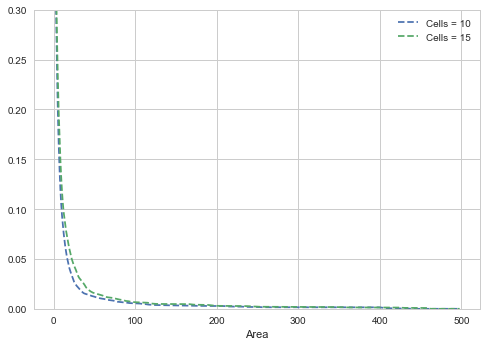

In [19]:
plt.figure()
plt.plot(a_10,'--', label= 'Cells = 10')
plt.plot(a_15,'--', label= 'Cells = 15')
plt.legend()
plt.xlabel('Area')
plt.ylim(0,0.3)
#plt.xlim(0,60)

In [20]:
'''
#generation1=[cells.mesh.area for cells in history_10[0]]
generation1 = [np.bincount(cells.mesh.face_id_by_edge) for cells in history_15[0]]
death=[cells.empty() for cells in history_15[0]]
properties= [cells.properties['parent_group'] for cells in history_15[0]]
ii=0
n=40#len(generation1)
a=[]
#fig=plt.figure()

for i in range(0,n,5):
    fig=plt.figure()
    valid=np.where(~death[i])[0]
    plt.hist(generation1[i][valid], label='time=%i'%i, alpha=0.5)
    plt.legend()
    #print(np.mean(generation1[i][valid]))
for i in xcoords:
    fig=plt.figure()
    valid=np.where(~death[i])[0]
    plt.hist(generation1[i][valid], label='time=%i'%i, alpha=0.5)
    plt.legend()
    #print(np.mean(generation1[i][valid]))
    
i=0
#plt.hist(generation1[i], label='time=%i'%i)
plt.xlabel('neigbours')

plt.figure()
for i in [0,15,80]:
    valid=np.where(~death[i])[0]
    plt.hist(generation1[i][valid], density=True, histtype='bar',label='time=%i'%i, alpha=0.5)
    plt.legend()
plt.xlabel('neigbours')
'''

"\n#generation1=[cells.mesh.area for cells in history_10[0]]\ngeneration1 = [np.bincount(cells.mesh.face_id_by_edge) for cells in history_15[0]]\ndeath=[cells.empty() for cells in history_15[0]]\nproperties= [cells.properties['parent_group'] for cells in history_15[0]]\nii=0\nn=40#len(generation1)\na=[]\n#fig=plt.figure()\n\nfor i in range(0,n,5):\n    fig=plt.figure()\n    valid=np.where(~death[i])[0]\n    plt.hist(generation1[i][valid], label='time=%i'%i, alpha=0.5)\n    plt.legend()\n    #print(np.mean(generation1[i][valid]))\nfor i in xcoords:\n    fig=plt.figure()\n    valid=np.where(~death[i])[0]\n    plt.hist(generation1[i][valid], label='time=%i'%i, alpha=0.5)\n    plt.legend()\n    #print(np.mean(generation1[i][valid]))\n    \ni=0\n#plt.hist(generation1[i], label='time=%i'%i)\nplt.xlabel('neigbours')\n\nplt.figure()\nfor i in [0,15,80]:\n    valid=np.where(~death[i])[0]\n    plt.hist(generation1[i][valid], density=True, histtype='bar',label='time=%i'%i, alpha=0.5)\n    plt.leg

Text(0.5,0,u'Shape index (P/sqrt(A))')

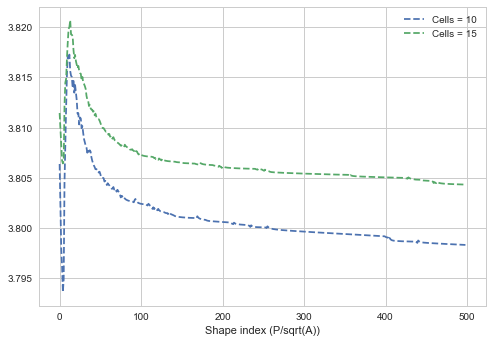

In [21]:
plt.plot(pp_10/np.sqrt(aa_10),'--', label= 'Cells = 10')
plt.plot(pp_15/np.sqrt(aa_15),'--', label= 'Cells = 15')
plt.legend()
plt.xlabel('Shape index (P/sqrt(A))')
#plt.xlim(0,100)

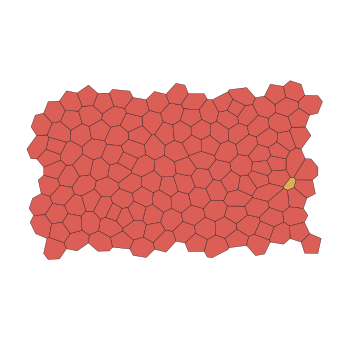

In [22]:
i=0
for cells in history_15[i]:
    cells.properties['color'] = definecolors(cells)
#     cells.properties['color'][cells.mesh.face_ids == 930 ]= 'b'
#     print(cells.mesh.area[cells.mesh.face_ids == 930] )

# definition of the frame for the interactive video
history_15_plot = history_15[i][0:70]#+history1
fig=plt.figure()
fig.set_size_inches(6,6);
ax = fig.gca()
# initialization function: plot the background of each frame
def init_fig():
    ax = plt.figure();
    return (ax,)
# animation function. This is called sequentially
def animate_fig(i):
    cells_array=history_15_plot
    v_max = np.max((np.max(cells_array[-1].mesh.vertices), np.max(cells_array[0].mesh.vertices)))
    size = 2.0*v_max
    cells= history_15_plot[i]
    return model.draw(cells,ax,size)
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig,animate_fig, init_func=init_fig,
                               frames=(len(history_15_plot)))
HTML(anim.to_html5_video())

# 20 celulas en el eje X
# Con expansion_constan= 1 (1./expansion_constant) = 1


In [23]:
history_20={}
#Line tensions can be reduced by increasing cell-cell adhesion or reducing actin- myosin contractility
#ids_Gamma0 = [1,15,30,6,98, 23,42,56,68,71]
ids_Gamma0 = random.sample(range(1, 200), 10)#40)
for i in range(Number_simulations):
    #run simulation with the choosen parameters
    rand =  np.random.RandomState() #random number to choose Lambda
    params = [K,G,L]  # K=x[0],G=x[1],L=x[2]
    mesh = init.toroidal_random_mesh(20,10,rand=rand)
    cells = model.Cells(mesh,properties={'K':K,'Gamma':G,'P':0.0,'boundary_P':P,'Lambda':L, 'Lambda_boundary':0.5, 'A0':1.0})
    force = TargetArea() + Tension() + Perimeter() + Pressure()
    history_init_20= run(basic_simulation(cells,force),50/dt,1/dt) #200/dt
    expansion_constant = 1
    force = TargetArea() + Tension() + Perimeter() + Pressure()
    cells = history_init_20[-1].copy()
    cells.properties['parent_group'] = np.zeros(len(cells),dtype=int)
    cells.properties['parent_group'][np.where([cells.mesh.face_ids == index for index in ids_Gamma0])[1]] = 1
    cells.properties['Gamma']= np.array([G,0])[cells.properties['parent_group']]
    cells.properties['Lambda']= np.array([L,Lambda_0])[cells.properties['parent_group']]
    force = TargetArea() + Tension() + Perimeter() + Pressure()
    history_20[i]= run(basic_simulation(cells,force),t_end/dt,.010/dt) #200/dt
    #save_data(i,history_10[i],'cells20')

In [24]:
a_20=np.zeros(len(history_20[0])-1)
a_std_20 = np.zeros(len(history_20[0])-1)
pp_20=np.zeros(len(history_20[0])-1)
aa_20=np.zeros(len(history_20[0])-1)
xcoords = []
for j in range(Number_simulations):
    force = TargetArea() + Tension() + Perimeter() + Pressure()
    generation_a=[cells.mesh.area for cells in  history_20[j]]
    generation_p=[cells.mesh.perimeter for cells in history_20[j]]
    generation_n=[np.bincount(cells.mesh.face_id_by_edge) for cells in history_20[j]]
    generation_f=[force(cells) for cells in history_20[j]] 
    death=[cells.empty() for cells in history_20[j]]
    properties= [cells.properties['parent_group'] for cells in history_20[j]]
    #mean variables in time
    # area_mean=[]
    area_mean=[]
    area_mean_20=[]
    area_std_20=[]
    perimeter_mean=[]
    neigh_mean_20=[]
    # area_total=[]
    #number_cells = []
    # ids_face_by_edge = []
    for i in range(0,len(history_20[j])-1):
        valid=np.where(~death[i] & (generation_a[i]>0))[0]
        cells_area_0= np.where((properties[-1]==1) & (generation_a[-1]==0))[0]
    #     number_cells = np.append(number_cells, len(valid))
    #     area_mean=np.append(area_mean,np.mean(generation_a[i][valid]))
    #     area_total=np.append(area_total,np.sum(generation_a[i][valid]))
        perimeter_mean=np.append(perimeter_mean,np.mean(generation_p[i][valid]))
        neigh_mean_20=np.append(neigh_mean_20,np.mean(generation_n[i][valid]))
        area_mean_20=np.append(area_mean_20,np.mean(generation_a[i][cells_area_0]))
        area_std_20=np.append(area_std_20,np.std(generation_a[i][cells_area_0])/len(generation_a[i][cells_area_0]))
        area_mean=np.append(area_mean,np.mean(generation_a[i][valid]))
    a_20=a_20+area_mean_20
    a_std_20=a_std_20+area_std_20
    aa_20=aa_20+area_mean
    pp_20=pp_20+perimeter_mean
a_20= a_20/Number_simulations
a_std_20=a_std_20/np.sqrt(Number_simulations)
aa_20= aa_20/Number_simulations
pp_20= pp_20/Number_simulations


(0, 150)

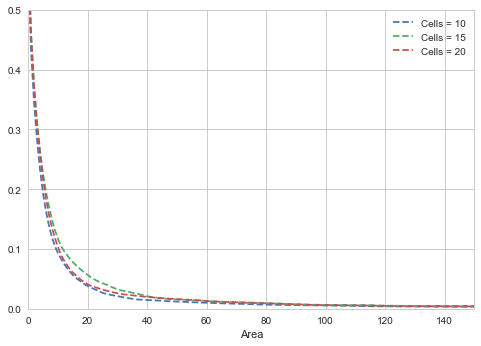

In [25]:
plt.figure()
plt.plot(a_10,'--',label='Cells = 10')
plt.plot(a_15,'--', label= 'Cells = 15')
plt.plot(a_20,'--', label= 'Cells = 20')
plt.legend()
plt.xlabel('Area')
plt.ylim(0,0.5)
plt.xlim(0,150)

(100, 500)

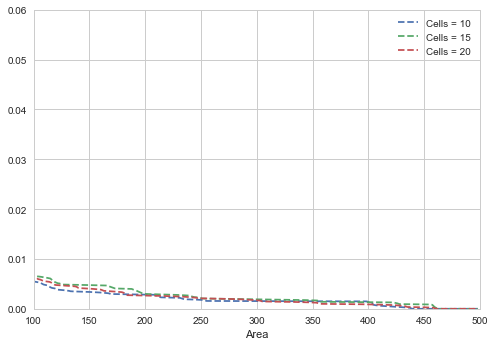

In [26]:
plt.figure()
plt.plot(a_10,'--',label='Cells = 10')
plt.plot(a_15,'--', label= 'Cells = 15')
plt.plot(a_20,'--', label= 'Cells = 20')
plt.legend()
plt.xlabel('Area')
plt.ylim(0,0.06)
plt.xlim(100,500)

(100, 500)

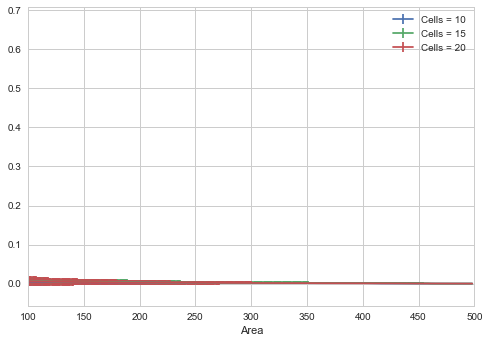

In [27]:
#plt.errorbar(a_10,yerr=a_std_10,fmt='b-', linewidth=3,label='Dorsal e11.5')
plt.figure()
plt.errorbar(range(len(a_10)),a_10,yerr=a_std_10,label='Cells = 10')
plt.errorbar(range(len(a_10)),a_15,yerr=a_std_15,label= 'Cells = 15')
plt.errorbar(range(len(a_10)),a_20,yerr=a_std_20, label= 'Cells = 20')
plt.legend()
plt.xlabel('Area')
#plt.ylim(0,0.06)
plt.xlim(100,500)

In [62]:
'''
def save_file(data,outputdirname,name):
    outfile_=outputdirname+name
    # outfile_f_units=outputdirname+"force_units_%0.3f"%I

    with open(outfile_,"w") as tfile:
        np.savetxt(tfile,data)

save_file(a_10,'cells10/','a_mean_10.dat')
save_file(a_15,'cells15/','a_mean_15.dat')
save_file(a_20,'cells20/','a_mean_20.dat')
save_file(a_std_10,'cells10/','a_std_10.dat')
save_file(a_std_15,'cells15/','a_std_15.dat')
save_file(a_std_20,'cells20/','a_std_20.dat')
'''
'''
#read file with data used in the paper (also in the folder Olds_simulations_Enero_2021)

a_10 = np.loadtxt("cells10/a_mean_10.dat")
a_std_10 = np.loadtxt("cells10/a_std_10.dat")
a_15 = np.loadtxt("cells15/a_mean_15.dat")
a_std_15 = np.loadtxt("cells15/a_std_15.dat")
a_20 = np.loadtxt("cells20/a_mean_20.dat")
a_std_20 = np.loadtxt("cells20/a_std_20.dat")'''

#Values of the area included in the paper
#10 hours correspond to position x[i] = 10*24/12=5
print "10h: 20 cells area", a_20[x[5]]*area_dimension/7/(0.6/7)
print "10h: 15 cells area", a_15[x[5]]*area_dimension/7/(0.6/7)
print "10h: 10 cells area", a_10[x[5]]*area_dimension/7/(0.6/7)



#2.5 hours correspond to position i = 2.5*24/12=1.25 (so i=1 and i=2 and calculate 1*1/4) es i= 52
#for i in range(12*8-1):
#    x.append(i*500/(12*8))
#    xlabels.append(i*24/(12*8.0))
print "2.5h: 20 cells area", (a_20[52])*area_dimension/7/(0.6/7)
print "2.5h: 15 cells area", (a_15[52])*area_dimension/7/(0.6/7)
print "2.5h: 10 cells area", (a_10[52])*area_dimension/7/(0.6/7)


#print x
#print xlabels

#print y
#print ylabels

#print 25*0.1183/0.085, area_dimension/7.0, 0.6/7, a_20[x[1]] #25=area_dimension/7.0 and 0.085 = 0.6/7

10h: 20 cells area 6.43419140819
10h: 15 cells area 4.39736563799
10h: 10 cells area 2.82155065318
2.5h: 20 cells area 29.2467361652
2.5h: 15 cells area 16.4101410151
2.5h: 10 cells area 7.38608775487


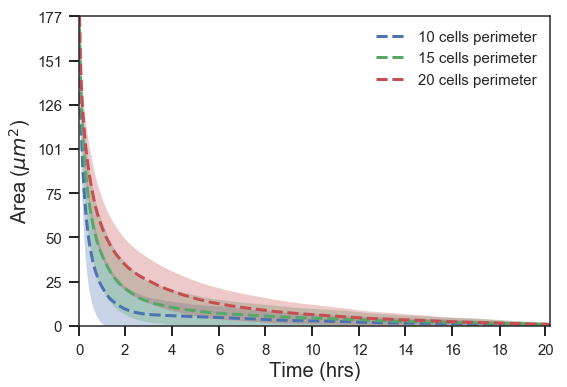

In [61]:
from matplotlib.ticker import StrMethodFormatter

plt.plot
plt.fill_between(range(len(a_10)), a_10+a_std_10, (a_10)-a_std_10, alpha=0.3)
plt.plot(a_10,'--',linewidth=3,label='10 cells perimeter')

plt.fill_between(range(len(a_15)), a_15+a_std_15, (a_15)-a_std_15, alpha=0.3)
plt.plot(a_15,'--',linewidth=3, label= '15 cells perimeter')

plt.fill_between(range(len(a_20)), a_20+a_std_20, (a_20)-a_std_20, alpha=0.3)
plt.plot(a_20,'--',linewidth=3, label= '20 cells perimeter')
plt.rcParams['ytick.labelsize']= 15
plt.rcParams['xtick.labelsize']= 15
plt.rcParams['legend.fontsize'] = 15
plt.legend()
plt.xlim(0,500)
plt.ylim(0,0.6)
plt.xlabel('Time (hrs)', size=20)
plt.ylabel(r'Area ($\mu m^2$)', size=20)
x=[]
xlabels=[]
for i in range(13):
    x.append(i*500/12)
    xlabels.append(i*24/12)
y=[]
ylabels=[]
for i in range(8):
    y.append(i*0.6/7)
    ylabels.append((i*area_dimension/7))
plt.xticks(x, xlabels)
plt.yticks(y,ylabels)
# Turns off grid on the left Axis.
#sns.reset_orig
sns.set_style('white', {'axes.linewidth': 1.5})
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.xlim(0,420)
plt.tight_layout()
plt.savefig('area_ratio_10_15_20.pdf')

In [29]:
np.mean(generation_a)

0.63060679501686745

(0, 100)

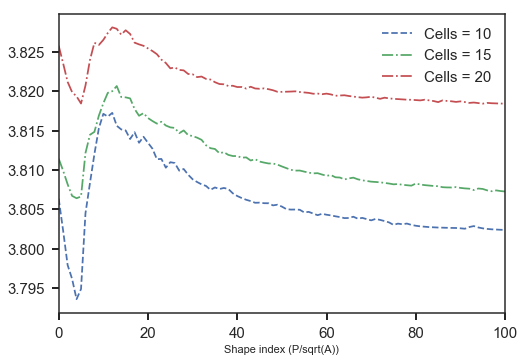

In [30]:
plt.figure()
plt.plot(pp_10/np.sqrt(aa_10),'--',label='Cells = 10')
plt.plot(pp_15/np.sqrt(aa_15),'-.', label= 'Cells = 15')
plt.plot(pp_20/np.sqrt(aa_20),'-.', label= 'Cells = 20')
plt.legend()
plt.xlabel('Shape index (P/sqrt(A))')
plt.xlim(0,100)

In [31]:
'''
#generation1=[cells.mesh.area for cells in history_10[0]]
generation1 = [np.bincount(cells.mesh.face_id_by_edge) for cells in history_20[0]]
death=[cells.empty() for cells in history_20[0]]
properties= [cells.properties['parent_group'] for cells in history_20[0]]
ii=0
n=40#len(generation1)
a=[]
#fig=plt.figure()

for i in range(0,n,5):
    fig=plt.figure()
    valid=np.where(~death[i])[0]
    plt.hist(generation1[i][valid], label='time=%i'%i, alpha=0.5)
    plt.legend()
    #print(np.mean(generation1[i][valid]))
for i in xcoords:
    fig=plt.figure()
    valid=np.where(~death[i])[0]
    plt.hist(generation1[i][valid], label='time=%i'%i, alpha=0.5)
    plt.legend()
    #print(np.mean(generation1[i][valid]))
    
i=0
#plt.hist(generation1[i], label='time=%i'%i)
plt.xlabel('neigbours')

plt.figure()
for i in [0,15,80]:
    valid=np.where(~death[i])[0]
    plt.hist(generation1[i][valid], density=True, histtype='bar',label='time=%i'%i, alpha=0.5)
    plt.legend()
plt.xlabel('neigbours')
'''

"\n#generation1=[cells.mesh.area for cells in history_10[0]]\ngeneration1 = [np.bincount(cells.mesh.face_id_by_edge) for cells in history_20[0]]\ndeath=[cells.empty() for cells in history_20[0]]\nproperties= [cells.properties['parent_group'] for cells in history_20[0]]\nii=0\nn=40#len(generation1)\na=[]\n#fig=plt.figure()\n\nfor i in range(0,n,5):\n    fig=plt.figure()\n    valid=np.where(~death[i])[0]\n    plt.hist(generation1[i][valid], label='time=%i'%i, alpha=0.5)\n    plt.legend()\n    #print(np.mean(generation1[i][valid]))\nfor i in xcoords:\n    fig=plt.figure()\n    valid=np.where(~death[i])[0]\n    plt.hist(generation1[i][valid], label='time=%i'%i, alpha=0.5)\n    plt.legend()\n    #print(np.mean(generation1[i][valid]))\n    \ni=0\n#plt.hist(generation1[i], label='time=%i'%i)\nplt.xlabel('neigbours')\n\nplt.figure()\nfor i in [0,15,80]:\n    valid=np.where(~death[i])[0]\n    plt.hist(generation1[i][valid], density=True, histtype='bar',label='time=%i'%i, alpha=0.5)\n    plt.leg

In [32]:
'''i=0
for cells in history_20[i]:
    cells.properties['color'] = definecolors(cells)
#     cells.properties['color'][cells.mesh.face_ids == 930 ]= 'b'
#     print(cells.mesh.area[cells.mesh.face_ids == 930] )

# definition of the frame for the interactive video
history_20_plot = history_20[i]#[0:50]#+history1
fig=plt.figure()
fig.set_size_inches(6,6);
ax = fig.gca()
# initialization function: plot the background of each frame
def init_fig():
    ax = plt.figure();
    return (ax,)
# animation function. This is called sequentially
def animate_fig(i):
    cells_array=history_20_plot
    v_max = np.max((np.max(cells_array[-1].mesh.vertices), np.max(cells_array[0].mesh.vertices)))
    size = 2.0*v_max
    cells= history_20_plot[i]
    return model.draw(cells,ax,size)
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig,animate_fig, init_func=init_fig,
                               frames=(len(history_20_plot)))
HTML(anim.to_html5_video())'''

"i=0\nfor cells in history_20[i]:\n    cells.properties['color'] = definecolors(cells)\n#     cells.properties['color'][cells.mesh.face_ids == 930 ]= 'b'\n#     print(cells.mesh.area[cells.mesh.face_ids == 930] )\n\n# definition of the frame for the interactive video\nhistory_20_plot = history_20[i]#[0:50]#+history1\nfig=plt.figure()\nfig.set_size_inches(6,6);\nax = fig.gca()\n# initialization function: plot the background of each frame\ndef init_fig():\n    ax = plt.figure();\n    return (ax,)\n# animation function. This is called sequentially\ndef animate_fig(i):\n    cells_array=history_20_plot\n    v_max = np.max((np.max(cells_array[-1].mesh.vertices), np.max(cells_array[0].mesh.vertices)))\n    size = 2.0*v_max\n    cells= history_20_plot[i]\n    return model.draw(cells,ax,size)\n# call the animator. blit=True means only re-draw the parts that have changed.\nanim = animation.FuncAnimation(fig,animate_fig, init_func=init_fig,\n                               frames=(len(history_20_p

# Pintar frames y video

In [34]:
'''# # Pintar frames
def animate(cells_array, facecolours='Default'):
    v_max = np.max((np.max(cells_array[0].mesh.vertices), np.max(cells_array[-1].mesh.vertices)))
    size = 2.0*v_max
    #to don't draw 
    fig = plt.figure()#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAa
    ax = fig.gca()#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAa
    fig.set_size_inches(6, 6)#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAa
    for cells in cells_array:#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAa
        draw(cells, ax, size)#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAa  #hasta aqui to don't draw        

def draw1(cells, ax=None, size=None):
    if not ax:
        fig = plt.figure()
        ax = fig.gca()  
    ax.cla()
    facecolors = cells.properties.get('color', None)

    mesh = cells.mesh.recentre()

    if facecolors is None:
        _draw_edges_non(mesh, ax)
    else:
        _draw_faces_no_edge(mesh, ax, facecolors)
    _draw_geometry(mesh.geometry, ax)

    ax.set_xticks([])
    ax.set_yticks([])

    size = size or 2.0*np.max(mesh.vertices[0])
    lim = [-0.55*size, 0.55*size]
    ax.set_xlim(lim)
    ax.set_ylim(lim)


        
def animate_video_mpg(cells_array,name_file,facecolours='Default'):    
    v_max = np.max((np.max(cells_array[0].mesh.vertices), np.max(cells_array[-1].mesh.vertices)))
    size = 2.0*v_max
    outputdir=name_file
    if not os.path.exists(outputdir): # if the folder doesn't exist create it
        os.makedirs(outputdir)
    fig = plt.figure(); 
    ax = fig.gca(); 
    fig.set_size_inches(6,6); 
    i=0
    frames=[]
    for cells in cells_array:
        model.draw(cells,ax,size)
        i=i+1
        frame=name_file+"/image%03i.png" % i
        fig.savefig(frame,dpi=500)
        frames.append(frame)  
#     os.system("mencoder 'mf://images/image*.png' -mf type=png:fps=20 -ovc lavc -lavcopts vcodec=wmv2 -oac copy  -o " + name_file)  
    os.system("ffmpeg -framerate 5/1 -i "+name_file+"/image%03d.png -c:v libx264 -r 30 -pix_fmt yuv420p "+ name_file+".mp4") #for Mac computer
#     for frame in frames: os.remove(frame)

def animate_video_mpg_zoom(cells_array,name_file,facecolours='Default'):    
    v_max = np.max((np.max(cells_array[0].mesh.vertices[1]), np.max(cells_array[-1].mesh.vertices[1])))
    size = 2.0*v_max
    outputdir="images"
    if not os.path.exists(outputdir): # if the folder doesn't exist create it
        os.makedirs(outputdir)
    fig = plt.figure(); 
    ax = fig.gca(); 
    fig.set_size_inches(6,6); 
    i=0
    frames=[]
    for cells in cells_array:
        model.draw(cells,ax,size)
        i=i+1
        frame="images/zoom_image%03i.png" % i
        fig.savefig(frame,dpi=500)
        frames.append(frame)  
    os.system("mencoder 'mf://images/zoom_image*.png' -mf type=png:fps=20 -ovc lavc -lavcopts vcodec=wmv2 -oac copy  -o " + name_file)  
    # os.system("ffmpeg -framerate 5/1 -i images/image%03d.png -c:v libx264 -r 30 -pix_fmt yuv420p test.mp4") #for Mac computer
#     for frame in frames: os.remove(frame)'''

'# # Pintar frames\ndef animate(cells_array, facecolours=\'Default\'):\n    v_max = np.max((np.max(cells_array[0].mesh.vertices), np.max(cells_array[-1].mesh.vertices)))\n    size = 2.0*v_max\n    #to don\'t draw \n    fig = plt.figure()#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAa\n    ax = fig.gca()#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAa\n    fig.set_size_inches(6, 6)#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAa\n    for cells in cells_array:#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAa\n        draw(cells, ax, size)#AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAa  #hasta aqui to don\'t draw        \n\ndef draw1(cells, ax=None, size=None):\n    if not ax:\n        fig = plt.figure()\n        ax = fig.gca()  \n    ax.cla()\n    facecolors = cells.properties.get(\'color\', None)\n\n    mesh = cells.mesh.recentre()\n\n    if facecolors is None:\n        _draw_edges_non(mesh, ax)\n    else:\n        _draw_faces_no_edge(mesh, ax, facecolors)\n    _draw_geometry(mesh.geometry, ax)\n\n    ax.set_xticks([])\n    ax.set_yticks([])\n\n    size 

In [35]:
'''animate_video_mpg(history_10_plot,"cell10_images",facecolours='Default')'''

'animate_video_mpg(history_10_plot,"cell10_images",facecolours=\'Default\')'

In [36]:
'''
history_20={}
#Line tensions can be reduced by increasing cell-cell adhesion or reducing actin- myosin contractility
#ids_Gamma0 = [1,15,30,6,98, 23,42,56,68,71]
ids_Gamma0 = random.sample(range(1, 200), 10)#40)
for i in range(Number_simulations):
    #run simulation with the choosen parameters
    rand =  np.random.RandomState() #random number to choose Lambda
    params = [K,G,L]  # K=x[0],G=x[1],L=x[2]
    mesh = init.toroidal_random_mesh(20,10,rand=rand)
    cells = model.Cells(mesh,properties={'K':K,'Gamma':G,'P':0.0,'boundary_P':P,'Lambda':L, 'Lambda_boundary':0.5, 'A0':1.0})
    force = TargetArea() + Tension() + Perimeter() + Pressure()
    history_init_20= run(basic_simulation(cells,force),50/dt,1/dt) #200/dt
    expansion_constant = 1
    force = TargetArea() + Tension() + Perimeter() + Pressure()
    cells = history_init_20[-1].copy()
    cells.properties['parent_group'] = np.zeros(len(cells),dtype=int)
    cells.properties['parent_group'][np.where([cells.mesh.face_ids == index for index in ids_Gamma0])[1]] = 1
    cells.properties['Gamma']= np.array([G,0])[cells.properties['parent_group']]
    cells.properties['Lambda']= np.array([L,Lambda_0])[cells.properties['parent_group']]
    force = TargetArea() + Tension() + Perimeter() + Pressure()
    history_20[i]= run(basic_simulation(cells,force),t_end/dt,.010/dt) #200/dt
    #save_data(i,history_10[i],'cells20')
'''
'''i=0
for cells in history_20[i]:
    cells.properties['color'] = definecolors(cells)
#     cells.properties['color'][cells.mesh.face_ids == 930 ]= 'b'
#     print(cells.mesh.area[cells.mesh.face_ids == 930] )

# definition of the frame for the interactive video
history_20_plot = history_20[i]#[0:50]#+history1
animate_video_mpg(history_20_plot,"cell20_images",facecolours='Default')'''

'i=0\nfor cells in history_20[i]:\n    cells.properties[\'color\'] = definecolors(cells)\n#     cells.properties[\'color\'][cells.mesh.face_ids == 930 ]= \'b\'\n#     print(cells.mesh.area[cells.mesh.face_ids == 930] )\n\n# definition of the frame for the interactive video\nhistory_20_plot = history_20[i]#[0:50]#+history1\nanimate_video_mpg(history_20_plot,"cell20_images",facecolours=\'Default\')'

In [37]:
'''animate_video_mpg(history_20_plot[0:15],"cell20_images",facecolours='Default')'''

'animate_video_mpg(history_20_plot[0:15],"cell20_images",facecolours=\'Default\')'

In [38]:
'''animate_video_mpg(history_15_plot,"cell15_images",facecolours='Default')'''

'animate_video_mpg(history_15_plot,"cell15_images",facecolours=\'Default\')'

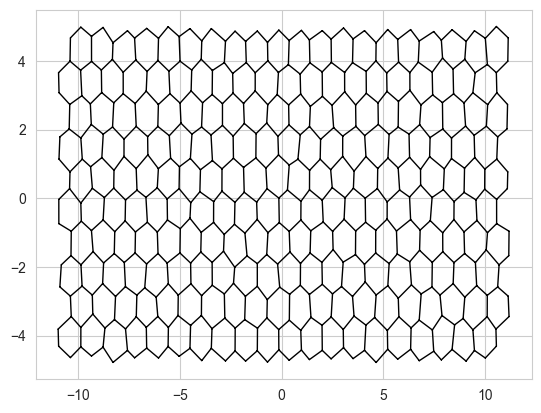

In [4]:
rand =  np.random.RandomState() #random number to choose Lambda
mesh = init.toroidal_hex_mesh(20,10,noise=0.2,rand=rand)
model.plotting._draw_edges(mesh, plt) 

In [40]:
'''Inicial= (mesh.vertices, 20, 10)'''

'Inicial= (mesh.vertices, 20, 10)'